# Linear Regression with Python
Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the BANGALORE. It would be great if you could some how create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the India,it is all in the data set: Bangalore_Houses.csv.

The data contains the following columns:

'Avg. Area Income': Avg. Income of residents of the city house is located in.
'Avg. Area House Age': Avg Age of Houses in same city
'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
'Area Population': Population of city house is located in
'Price': Price that the house sold at
'Address': Address for the house

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('Bangalore_houses.csv')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              1000 non-null   float64
 1   Avg. Area House Age           1000 non-null   float64
 2   Avg. Area Number of Rooms     1000 non-null   float64
 3   Avg. Area Number of Bedrooms  1000 non-null   float64
 4   Area Population               1000 non-null   float64
 5   Price                         1000 non-null   float64
 6   Address                       1000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 54.8+ KB


In [101]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,96429.282193,8.550228,2.905513,2.230701,491569.465412,18334.280544,Dasarahalli(srinagar)
1,90642.698101,11.758695,2.959586,3.912470,528642.359936,46615.036426,Kumbalgodu Gollahalli
2,91969.344039,25.540857,2.118370,3.521423,765767.572995,47724.423478,Bannerghatta
3,87330.774848,9.737636,2.556867,3.704541,363272.053056,27927.950879,Kumaraswamy Layout
4,86530.089593,7.791504,2.032627,2.306602,481864.609840,37560.664090,Panathur
...,...,...,...,...,...,...,...
995,58782.474965,16.462235,2.461071,1.896563,246339.325958,34880.363172,Banashankari Iii Stage
996,50079.476996,18.324045,2.981309,2.040355,480286.589157,23565.133057,Bannerghatta
997,50764.226674,13.224788,2.499957,1.504609,570959.760802,15235.277635,Electronics City
998,76484.216928,17.089084,2.201423,2.568574,694153.490228,40931.997307,Agara


In [56]:
df.head(50)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,96429.282193,8.550228,2.905513,2.230701,491569.465412,18334.280544,Dasarahalli(srinagar)
1,90642.698101,11.758695,2.959586,3.912470,528642.359936,46615.036426,Kumbalgodu Gollahalli
2,91969.344039,25.540857,2.118370,3.521423,765767.572995,47724.423478,Bannerghatta
3,87330.774848,9.737636,2.556867,3.704541,363272.053056,27927.950879,Kumaraswamy Layout
4,86530.089593,7.791504,2.032627,2.306602,481864.609840,37560.664090,Panathur
5,61855.002658,10.170151,2.816203,2.080618,712908.829156,29828.066654,Bellandur
6,88747.440252,29.028077,2.189043,2.084860,498280.576067,47820.964275,Bannerghatta
7,57523.413114,14.397942,2.067627,3.242355,481004.563860,19058.015786,Chikkalasandra
8,67964.297660,10.882872,2.572262,2.503188,582471.460319,46891.899709,Mallathahalli
9,86607.060609,9.920367,2.404890,2.260842,525542.142745,48716.286757,Begur


In [57]:
df.tail(50)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
950,87946.231618,20.176288,2.675691,1.832035,369282.549359,42324.906974,Shanthinagar
951,68915.591886,11.663488,2.229848,2.347639,673158.890654,26447.850460,Rajarajeshwarinagar
952,75222.963911,20.608941,2.527118,2.773919,973084.790833,46807.273014,Agara
953,43690.469154,18.960425,2.784964,3.360469,600903.358870,24677.240028,Girinagar
954,46754.398211,15.445893,2.623433,1.223487,537110.636561,43821.507355,Jayanagar
955,62284.279059,11.154898,2.063591,3.638839,625172.883503,16175.588297,Viveknagar
956,52447.526935,21.498224,2.851713,2.416480,329929.014015,43352.240422,Rajarajeshwarinagar
957,89445.139882,7.673349,2.062927,3.771139,475889.902231,28545.908412,Begur
958,77035.622660,16.740166,2.067909,1.167896,901216.109444,22123.539988,Chandapura
959,89346.368564,13.685982,2.866812,1.556583,408125.757361,38088.496303,HSR Layout


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              1000 non-null   float64
 1   Avg. Area House Age           1000 non-null   float64
 2   Avg. Area Number of Rooms     1000 non-null   float64
 3   Avg. Area Number of Bedrooms  1000 non-null   float64
 4   Area Population               1000 non-null   float64
 5   Price                         1000 non-null   float64
 6   Address                       1000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 54.8+ KB


In [59]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,70242.512626,17.310057,2.506740,2.469451,612466.244942,32276.873299
std,17077.959920,7.185109,0.295220,0.874466,228812.039648,10410.536963
min,40004.987221,5.002409,2.000324,1.000743,203121.743658,15085.209247
25%,56270.572451,11.264159,2.250175,1.704540,412544.362267,23159.284921
50%,69246.152752,17.121053,2.526383,2.421697,616056.437064,32075.357871
75%,85158.048102,23.421807,2.761847,3.234420,811503.167684,41670.586478
max,99986.516172,29.999045,2.999538,3.998647,999989.566697,49975.098632


# EDA
Exploratory Data Analysis

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

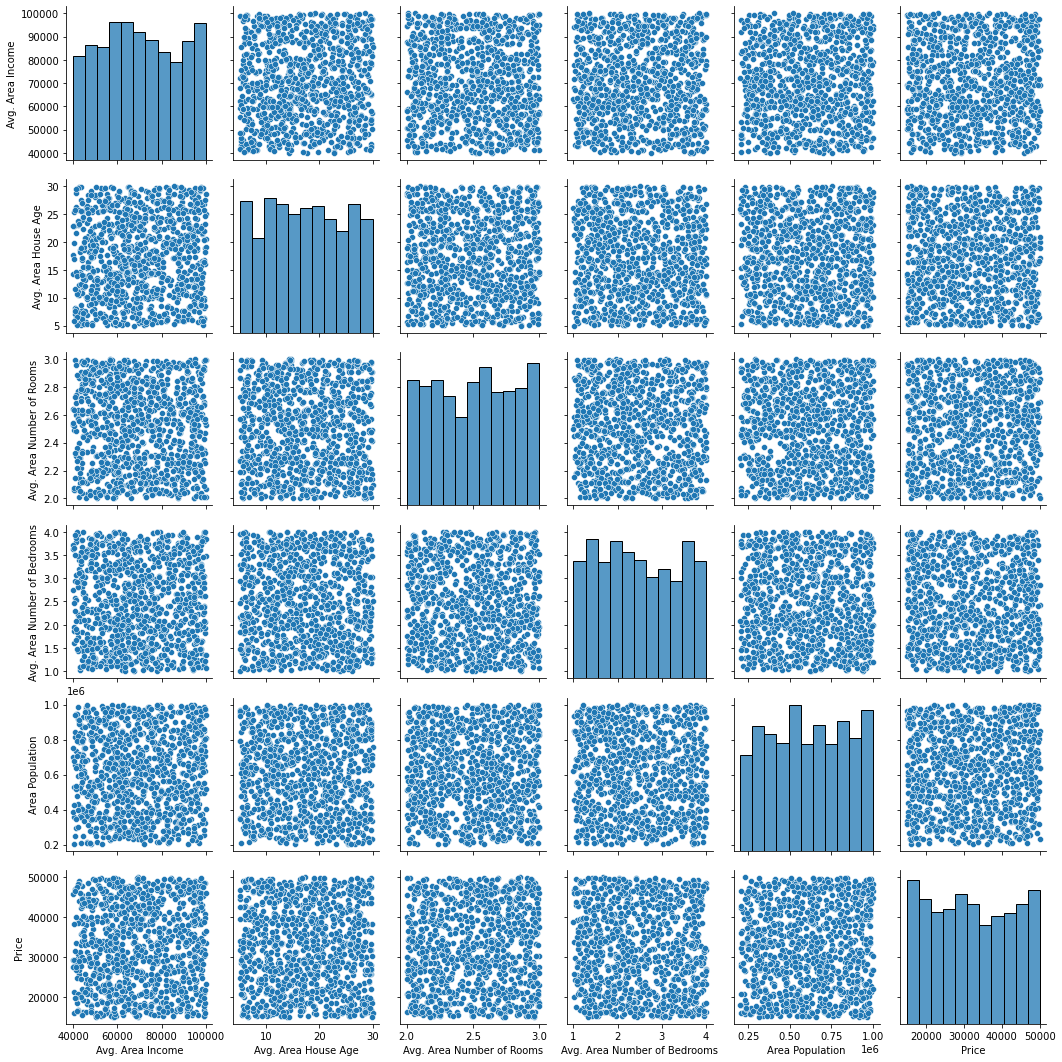

In [60]:
sns.pairplot(df) # it will draw joint plot and distribution plot together

/Users/farhanhaider/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

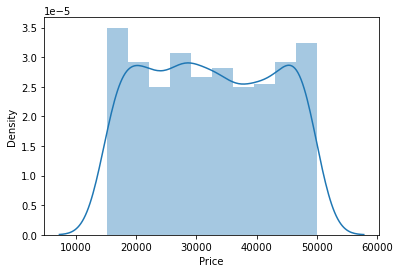

In [61]:
sns.distplot(df['Price'])

<AxesSubplot:>

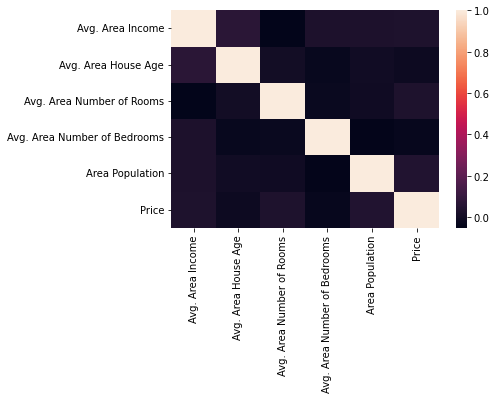

In [62]:
sns.heatmap(df.corr())

# Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

X and y arrays

In [63]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [64]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

# Train Test Split
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)

In [67]:
y_test

749    20083.313307
794    35221.418177
130    45519.660008
686    23475.682832
883    17726.839681
           ...     
572    27014.232949
615    46987.674568
584    24193.982612
965    42440.080788
913    17358.036702
Name: Price, Length: 900, dtype: float64

# Creating and Training the Model

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lr = LinearRegression()

In [70]:
lr.fit(X_train,y_train)

LinearRegression()

In [71]:
p=lr.predict(X_test)

In [72]:
p

array([35404.95303462, 32464.97848999, 33035.7621335 , 36170.30715461,
       32735.82969124, 35123.99276261, 31623.29715005, 36881.75795334,
       36997.43662921, 34675.75253888, 34460.47581751, 33812.09832126,
       32233.2879239 , 36815.78352522, 30682.6029269 , 33668.46416193,
       34310.41212874, 37286.31875394, 30853.72408224, 38394.75170754,
       36652.78116313, 32416.04957365, 36477.83841443, 35252.56343164,
       31852.69762699, 35960.09480272, 35192.69532451, 31298.3287918 ,
       34712.65059034, 31902.66561343, 33308.46281314, 30039.12474287,
       36153.71988621, 32616.55225233, 36190.70035791, 34467.76142129,
       33268.31288241, 33415.20425668, 34504.70816987, 34035.45239043,
       32466.84921661, 32745.08274538, 31170.26930702, 32701.19564969,
       33920.80728981, 33082.22866792, 35086.03494614, 34750.43913936,
       33055.32931971, 34300.46856844, 34619.46235415, 34198.6323709 ,
       32682.0351    , 32007.09651361, 37070.54768799, 35232.21520364,
      

In [73]:
dft =  pd.read_csv('test.csv')

In [74]:
dft

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,69545.45857,5.682861,7.009188,4.09,23086.8005


In [75]:
lr.predict(dft)

array([35582.27577882])

In [76]:
print(lr.intercept_)

28345.91341880036


In [77]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,-0.035364
Avg. Area House Age,66.667858
Avg. Area Number of Rooms,341.350985
Avg. Area Number of Bedrooms,1677.416131
Area Population,0.002758


# Interpreting the coefficients:
Holding all other features fixed, a 1 unit increase in Avg. Area Income is associated with an increase of $21.52 . Holding all other features fixed, a 1 unit increase in Avg. Area House Age is associated with an increase of $164883.28 . Holding all other features fixed, a 1 unit increase in Avg. Area Number of Rooms is associated with an increase of $122368.67 . Holding all other features fixed, a 1 unit increase in Avg. Area Number of Bedrooms is associated with an increase of $2233.80 . Holding all other features fixed, a 1 unit increase in Area Population is associated with an increase of $15.15 .

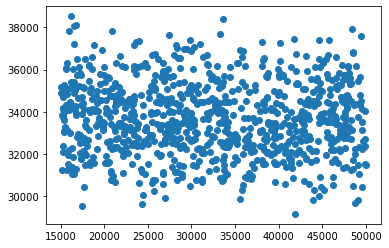

In [78]:
plt.scatter(y_test,p)

/Users/farhanhaider/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


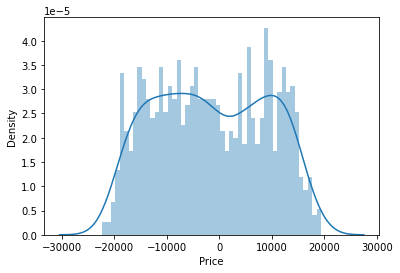

In [79]:
sns.distplot((y_test-p),bins=50);

# In the context of machine learning, absolute error refers to the magnitude of difference between the prediction of an observation and the true value of that observation. MAE takes the average of absolute errors for a group of predictions and observations as a measurement of the magnitude of errors for the entire group.

# The Mean Squared Error (MSE) is perhaps the simplest and most common loss function, often taught in introductory Machine Learning courses. To calculate the MSE, you take the difference between your model's predictions and the ground truth, square it, and average it out across the whole dataset

# Root mean square error or root mean square deviation is one of the most commonly used measures for evaluating the quality of predictions. It shows how far predictions fall from measured true values using Euclidean distance.¶ 

# Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)**  is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

__Mean Squared Error (MSE)__ is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [80]:
from sklearn import metrics

In [81]:
print('MAE:', metrics.mean_absolute_error(y_test, p))
print('MSE:', metrics.mean_squared_error(y_test, p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, p)))

MAE: 9316.392578107301
MSE: 114946115.50161086
RMSE: 10721.292622702305


In [82]:
r2_score = lr.score(X_test,y_test)
print(r2_score*100,'%')

-6.635775968581692 %


In [83]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [84]:
p=regressor.predict(X_test)

In [85]:
p

array([34604.67459089, 34603.12278938, 34604.80480029, 34604.53473003,
       34604.56374337, 34603.1120424 , 34603.42339038, 34604.80472344,
       34604.77967588, 34603.7147322 , 34604.5523876 , 34604.3920217 ,
       34603.06764043, 34604.86533447, 34603.12960604, 34604.14940277,
       34603.18394182, 34604.62302757, 34603.41587471, 34604.82388166,
       34603.71406903, 34604.76645692, 34604.63036866, 34603.21295711,
       34603.47782239, 34603.96901908, 34603.76270659, 34604.77668681,
       34604.65336597, 34604.11828238, 34604.15619776, 34603.1371794 ,
       34603.66983307, 34604.60010488, 34604.84647305, 34604.54416282,
       34603.08908067, 34604.61660238, 34604.84329707, 34603.07594527,
       34603.27711666, 34603.17435666, 34603.10238795, 34604.66042328,
       34604.39231112, 34604.72431944, 34604.7982226 , 34603.11014775,
       34604.06233396, 34603.17759631, 34603.62713877, 34603.42727422,
       34604.15058483, 34603.67309811, 34604.3511358 , 34604.86493034,
      

In [86]:
regressor.predict(dft)

array([34603.15019845])

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

In [88]:
# define model
model = Ridge(alpha=1.0)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 9387.369 (1520.031)


In [89]:
model.fit(X_train, y_train)
p=model.predict(X_test)

In [90]:
p

array([35389.23440601, 32475.46484912, 33058.84418291, 36137.82092391,
       32738.21373449, 35093.91777401, 31643.21284551, 36834.49802822,
       36978.81752859, 34688.67838891, 34464.78350031, 33811.1719229 ,
       32235.64088242, 36772.95551036, 30731.41103186, 33672.93466811,
       34294.6135346 , 37247.70225067, 30901.76477483, 38364.49897387,
       36594.70859305, 32461.20166479, 36462.93428053, 35212.44599697,
       31848.28899818, 35930.97442118, 35169.35975354, 31339.2313221 ,
       34692.26165989, 31928.21095365, 33312.20818569, 30089.50342503,
       36137.81536156, 32618.90963661, 36140.50480345, 34452.79275452,
       33260.90947732, 33436.36266555, 34495.33800136, 34015.53948803,
       32491.79278438, 32766.82489162, 31182.1378666 , 32731.65276416,
       33932.45673489, 33098.15246785, 35075.15849899, 34706.76944859,
       33054.56018704, 34282.22097586, 34603.66511849, 34186.05612146,
       32711.16282338, 32022.27720912, 37044.97750461, 35236.25811441,
      

In [91]:
model.predict(dft)

array([35329.73829782])

In [92]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [93]:
# predicting a new value

# test the output by changing values, like 3750
yp = regressor.predict(X_test)

# print the predicted price
print("Predicted price:", yp)

Predicted price: [25833.61090858 16007.02007493 24888.93425396 33143.66595658
 44897.86331188 46393.86615975 46475.87794244 28765.18392232
 40774.25075208 18165.09627529 26315.18737344 48848.96079169
 44866.12325307 28765.18392232 28520.71438504 16007.02007493
 46393.86615975 39806.81898227 18310.59830121 46694.78220186
 29599.36827539 18310.59830121 18554.54062728 34122.39818977
 46475.87794244 37340.96962861 18309.73073664 17888.41890712
 40919.94027004 17888.41890712 33143.66595658 35462.8403853
 40774.25075208 19018.98309373 29029.74044464 25833.61090858
 16208.78953139 33430.29172636 39137.35732866 33385.05573648
 38730.66019392 18554.54062728 19018.98309373 18554.54062728
 26315.18737344 22916.59026298 25833.61090858 46615.03642576
 47672.80956725 16208.78953139 30390.47137775 29328.88327915
 40774.25075208 46475.87794244 40774.25075208 49597.35615292
 40919.94027004 18165.09627529 33143.66595658 39530.05399038
 46694.78220186 46158.71302782 29141.78713346 26913.82154041
 29328.8

In [94]:
regressor.predict(dft)

array([18309.73073664])

In [95]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 15232.210899125806
RMSE value for k=  2 is: 12513.671852037827
RMSE value for k=  3 is: 11827.04563375039
RMSE value for k=  4 is: 11375.289762471719
RMSE value for k=  5 is: 11136.809431194393
RMSE value for k=  6 is: 10989.309676527506
RMSE value for k=  7 is: 10902.00683808644
RMSE value for k=  8 is: 10896.500437510438
RMSE value for k=  9 is: 10839.174710748532
RMSE value for k=  10 is: 10762.646656217974
RMSE value for k=  11 is: 10751.082258727525
RMSE value for k=  12 is: 10705.45320437922
RMSE value for k=  13 is: 10682.140633193976
RMSE value for k=  14 is: 10665.09169909932
RMSE value for k=  15 is: 10627.957880679913
RMSE value for k=  16 is: 10640.05664069228
RMSE value for k=  17 is: 10632.221191356191
RMSE value for k=  18 is: 10626.50642636636
RMSE value for k=  19 is: 10606.965321140597
RMSE value for k=  20 is: 10598.274944067944


<AxesSubplot:>

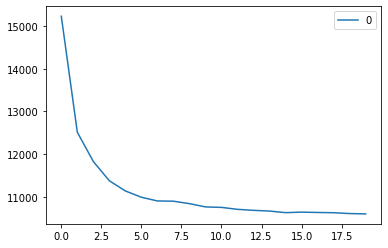

In [97]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

# As we discussed, when we take k=1, we get a very high RMSE value. The RMSE value decreases as we increase the k value. At k= 7, the RMSE is approximately 1219.06, and shoots up on further increasing the k value. We can safely say that k=7 will give us the best result in this case.

In [98]:
import pickle

In [100]:
pickle.dump(lr,open('model.pk1','wb'))